# Computing derivatives of the Artificial Neural Networks (ANNs)

## Table of Content <a name="TOC"></a>

1. [General setups](#setups)

2. [Example 1: Function of 1 input and 1 output](#example-1) 

3. [Example 2: Function of 2 inputs and 1 output](#example-2) 


### A. Learning objectives

- to train an ANN to approximate analytical functions
- to compute derivatives of the ANN outputs w.r.t. ANN inputs

### B. Use cases

- [Deep machine learning: Multilayer Perceptron](#mlp-1)
- [Derivatives of the ANNs](#ann-derivative-1)


### C. Functions

None
  
  
### D. Classes and class members

- `liblibra::libann`
  - [`NeuralNetwork`](#NeuralNetwork-1)        
    - [`propagate`](#propagate-1)
    - [`derivatives`](#derivatives-1) | [also here](#derivatives-2)
    - [`init_weights_biases_uniform`](#init_weights_biases_uniform-1)
    - [`train`](#train-1)   
    
- `libra_py`
  - `data_conv`  
    - [`MATRIX2nparray`](#MATRIX2nparray-1)
  - `data_outs`
    - [`print_matrix`](#print_matrix-1)
  - `data_visualize`
    - [`plot_map`](#plot_map-1)


## 1. General setups
<a name="setups"></a> [Back to TOC](#TOC)

In [1]:
import math
import sys
import cmath
import math
import os

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
import util.libutil as comn

from libra_py import units
from libra_py import data_outs, data_conv, data_visualize
import matplotlib.pyplot as plt   # plots
#matplotlib.use('Agg')
#%matplotlib inline 

import numpy as np
#from matplotlib.mlab import griddata

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

/home/alexey/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<float, std::all

## 2. Example 1: Function of 1 input and 1 output
<a name="example-1"></a> [Back to TOC](#TOC)

### 2.1. Function approximation

Let's train ANN to approximate the function $y = x^2$ for x in [-0.5, 0.5]. We use the data (patterns) sampled uniformly in this interval.

For simpliicty, we will use only 11 points

In [2]:
N = 10

inputs = MATRIX(1, N)
outputs = MATRIX(1, N)

for i in range(N+1):
    x = -0.5 + i/float(N)
    y = x * x 
    inputs.set(0, i, x)
    outputs.set(0, i, y)

Training process
<a name="train-1"></a><a name="mlp-1"></a><a name="print_matrix-1"></a><a name="init_weights_biases_uniform-1"></a><a name="propagate-1"></a><a name="NeuralNetwork-1"></a>

In [3]:
rnd = Random()

ANN = NeuralNetwork( Py2Cpp_int( [1, 3, 1] ) )
ANN.init_weights_biases_uniform(rnd, -0.1, 0.1, -0.1, 0.1)

params = { "num_epochs":25, 
           "steps_per_epoch":50000, 
           "epoch_size":10, "learning_rate":0.25, 
           "verbosity":1 }

ANN.train(rnd, params, inputs, outputs )

Y = ANN.propagate(inputs)
data_outs.print_matrix(Y[2])

0.2487305435890827  0.16169341961317873  0.09092300793043556  0.03954779867834204  0.008867304420471081  -0.0008940761773984416  0.009998969471870728  0.04102096261835705  0.09123769348308247  0.15886640569534424  


As an output, Y is a list of 1x11 matrices, containing the outputs of each layer of the ANN. We are interested in the last one (output), so, `Y[2]`

The matrix of interes contains 1 function value for each of the 11 input points (samples), hence 1 x 11. 

For convenience (and plotting), we need to convert the 1x11 matrix into a list (numpy array) of 11 points. This is done with `data_conv.MATRIX2nparray` <a name="MATRIX2nparray-1"></a>

In [4]:
x = data_conv.MATRIX2nparray(inputs)[0][:]
y = data_conv.MATRIX2nparray(Y[2])[0][:]
y_target = x*x

print(x)
print(y)
print(y_target)

[-0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4]
[ 0.24873054  0.16169342  0.09092301  0.0395478   0.0088673  -0.00089408
  0.00999897  0.04102096  0.09123769  0.15886641]
[0.25 0.16 0.09 0.04 0.01 0.   0.01 0.04 0.09 0.16]


Let's plot the results. 

Depending on the parameters of simulation, the results may be not as impressive as what is shown below (so the used parameters seem to be quite good). In fact, it took me several trials to get good results like this.

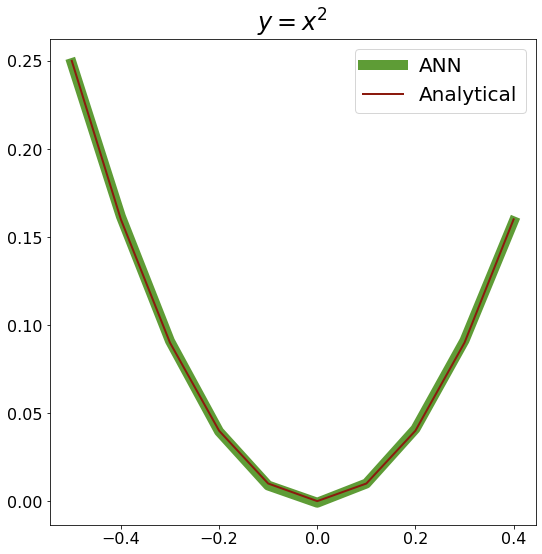

In [5]:
plt.figure(1, figsize=(9, 9))
plt.title("$y = x^2$")
plt.plot(x, y, label="ANN", linewidth=10, color=colors["21"])
plt.plot(x, y_target, label="Analytical", linewidth=2, color=colors["11"])
plt.legend()

### 2.2. Derivatives
<a name="ann-derivative-1"></a>
Once we get a nice fitting of the function itself, we are ready to compute the derivatives of the ANN outputs w.r.t. ANN inputs, and we'd do this for as many patterns (input points) as needed. 

Note that the calculated derivatives are analytical, not numerical. So, even if the approximation is not "ideal", the derivatives are exact, just for a less "accurate" ANN

This is done with the help of `derivatives` method of the `NeuralNetwork` class

This function returns a list of 11 matrices - so `der[i]` is the result for the given input point i.
Each matrix is of size 1 x 1 - because the original ANN has 1 input and 1 output.
<a name="derivatives-1"></a>

In [6]:
der = ANN.derivatives(inputs)

Extract the data into a suitable format

In [7]:
der1 = []
for i in range(len(der)):
    der1.append( der[i].get(0,0))
print(der1)

[-0.9355117718682371, -0.7961179103051527, -0.6141716408825217, -0.411303190438979, -0.20203438029043025, 0.006327443811070421, 0.21068423085573817, 0.4082764585655401, 0.5931839650722031, 0.7541758368851362]


And plot

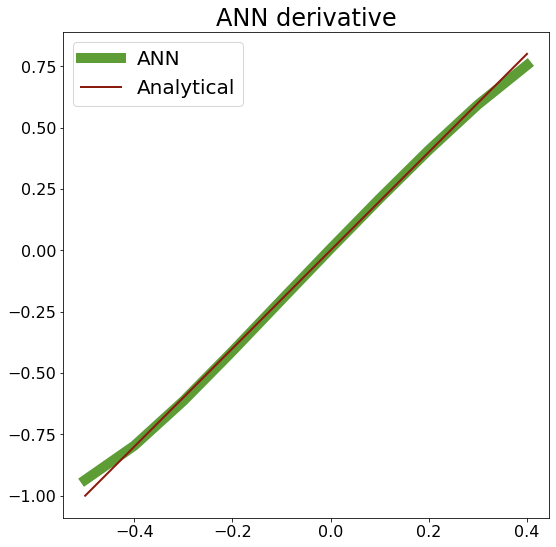

In [8]:
der_target = 2 * x
plt.figure(1, figsize=(9, 9))
plt.title("ANN derivative")
plt.plot(x, der1, label="ANN", linewidth=10, color=colors["21"])
plt.plot(x, der_target, label="Analytical", linewidth=2, color=colors["11"])
plt.legend()

## 3. Example 2: Function of 2 inputs and 1 output
<a name="example-2"></a> [Back to TOC](#TOC)

### 3.1. Function approximation
Let's train ANN to approximate the function $z = \frac{1}{2} sin(x) cos(y)$ for $(x,y) \in [-2.0, 2.0] \times [-2.0, 2.0]$. 

In [9]:
nx, ny = 21, 21

x_grid = []
for i in range(nx):
    x_grid.append(  -2 + 4*i/float(nx-1) )
    
y_grid = []
for i in range(ny):
    y_grid.append(  -2 + 4*i/float(ny-1) )


Sample patterns

In [10]:
inputs = MATRIX(2, nx*ny)
outputs = MATRIX(1, nx*ny)

z_ref_1D = np.zeros( (nx*ny), dtype=float )

cnt = 0
for i in range(nx):
    for j in range(ny):    
                
        z = 0.5*math.sin(x_grid[i])*math.cos(y_grid[j])
        z_ref_1D[cnt] = z
        
        inputs.set(0, cnt, x_grid[i])
        inputs.set(1, cnt, y_grid[j])
        outputs.set(0, cnt, z)
        
        cnt = cnt + 1

Compute the derivatives w.r.t. to x and y variables at every grid point

In [11]:
dzdx_ref_1D = np.zeros( (nx*ny), dtype=float )
dzdy_ref_1D = np.zeros( (nx*ny), dtype=float )

cnt = 0
for i in range(nx):
    for j in range(ny):    
                        
        dzdx_ref_1D[cnt] = 0.5*math.cos(x_grid[i])*math.cos(y_grid[j])
        dzdy_ref_1D[cnt] =-0.5*math.sin(x_grid[i])*math.sin(y_grid[j])
                        
        cnt = cnt + 1

Train the ANN

In [12]:
ANN = NeuralNetwork( Py2Cpp_int( [2, 5, 1] ) )
ANN.init_weights_biases_uniform(rnd, -0.1, 0.1, -0.1, 0.1)

params = { "num_epochs":25, 
           "steps_per_epoch":5000, 
           "epoch_size":100, "learning_rate":0.25, 
           "verbosity":1 }

ANN.train(rnd, params, inputs, outputs )

Y = ANN.propagate(inputs)
data_outs.print_matrix(Y[2])

0.23042357483438908  0.11656087869534823  0.004000593036146502  -0.10147957768432225  -0.19534746397705804  -0.27483597678328103  -0.3388430186489337  -0.3874458509592098  -0.42132328526211915  -0.4412743169566752  -0.44789561362925256  -0.44140718577620086  -0.42159840348430233  -0.3878816891142529  -0.33946605946924735  -0.27567791404086783  -0.19643960246017317  -0.10284402139286845  0.002361488812666899  0.11467276031743691  0.2283409624652997  0.22634155713031134  0.11441642627492309  0.001783072729645715  -0.10560764197947384  -0.20263833199318887  -0.28580529483956885  -0.35336310440518537  -0.4049571015993331  -0.4410405820328273  -0.46232672876891334  -0.4693938034310768  -0.46246180764902206  -0.4413217030165338  -0.405405769750693  -0.3540098933341303  -0.2866861970492598  -0.20378782290484124  -0.10704846388454461  5.097896982815222e-05  0.11242293596659854  0.22414454984136284  0.2201868914775072  0.1130502436025991  0.0033961379243544567  -0.10305592925823126  -0.20091774

In [13]:
z = data_conv.MATRIX2nparray(Y[2])[0][:]

print(z)

[ 2.30423575e-01  1.16560879e-01  4.00059304e-03 -1.01479578e-01
 -1.95347464e-01 -2.74835977e-01 -3.38843019e-01 -3.87445851e-01
 -4.21323285e-01 -4.41274317e-01 -4.47895614e-01 -4.41407186e-01
 -4.21598403e-01 -3.87881689e-01 -3.39466059e-01 -2.75677914e-01
 -1.96439602e-01 -1.02844021e-01  2.36148881e-03  1.14672760e-01
  2.28340962e-01  2.26341557e-01  1.14416426e-01  1.78307273e-03
 -1.05607642e-01 -2.02638332e-01 -2.85805295e-01 -3.53363104e-01
 -4.04957102e-01 -4.41040582e-01 -4.62326729e-01 -4.69393803e-01
 -4.62461808e-01 -4.41321703e-01 -4.05405770e-01 -3.54009893e-01
 -2.86686197e-01 -2.03787823e-01 -1.07048464e-01  5.09789698e-05
  1.12422936e-01  2.24144550e-01  2.20186891e-01  1.13050244e-01
  3.39613792e-03 -1.03055929e-01 -2.00917748e-01 -2.86074595e-01
 -3.56089562e-01 -4.10035857e-01 -4.47988744e-01 -4.70456110e-01
 -4.77926099e-01 -4.70595163e-01 -4.48279155e-01 -4.10501586e-01
 -3.56764180e-01 -2.86996646e-01 -2.02122610e-01 -1.04564856e-01
  1.58644270e-03  1.10972

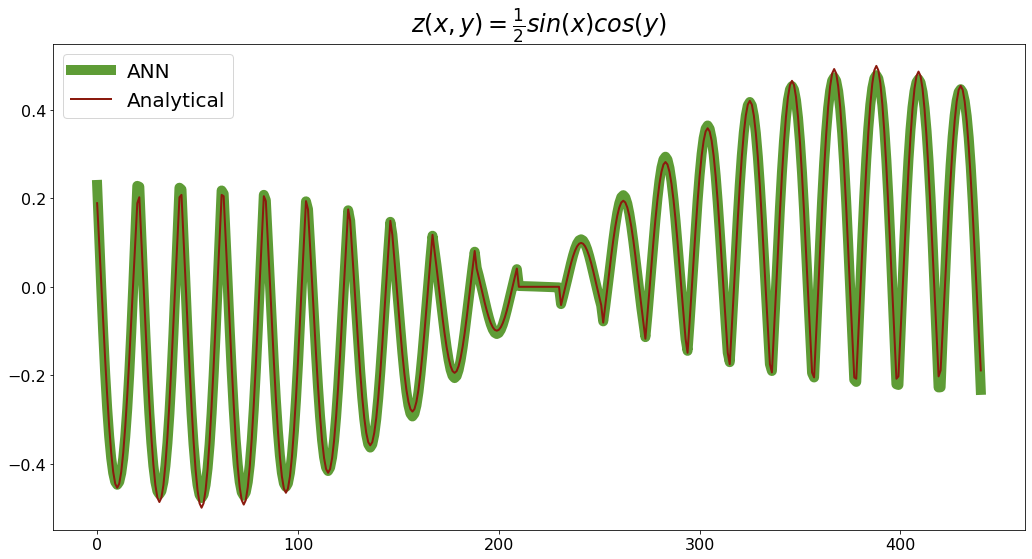

In [14]:
indx = list( range( len(z) ))
plt.figure(1, figsize=(18, 9))
plt.title("$ z(x,y) = \\frac{1}{2} sin(x) cos(y)$")
plt.plot(indx, z, label="ANN", linewidth=10, color=colors["21"])
plt.plot(indx, z_ref_1D, label="Analytical", linewidth=2, color=colors["11"])
plt.legend()

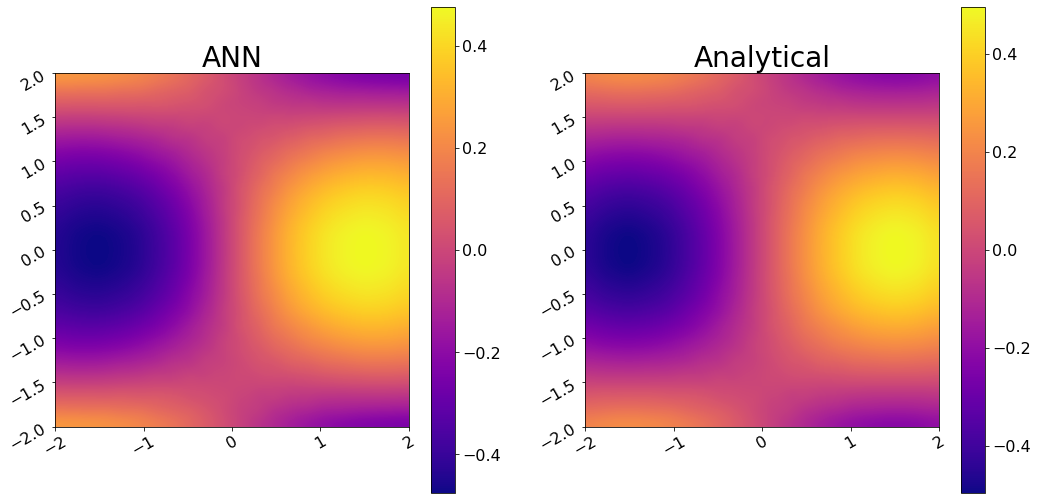

In [15]:
plt.rc('axes', titlesize=28)
plt.figure(1, figsize=(18, 9))
plt.title("$ z(x,y) = \\frac{1}{2} sin(x) cos(y)$")
plt.subplot(1,2,1)
plt.title("ANN")
data_visualize.plot_map(plt, x_grid, y_grid, z.reshape(nx, ny), colormap="plasma", resolution=30j, savefig=1, figure_name="2D_func_ann.png")

plt.subplot(1,2,2)
plt.title("Analytical")
data_visualize.plot_map(plt, x_grid, y_grid, z_ref_1D.reshape(nx, ny), colormap="plasma", resolution=30j, savefig=1, figure_name="2D_func_ref.png")

### 3.2. Derivatives 

Now, let's compute the derivatives
<a name="derivatives-2"></a>

In [16]:
der = ANN.derivatives(inputs)

Convert to the 1D numpy arrays

In [17]:
sz = len(der)
der1, der2 = np.zeros( (sz), dtype=float), np.zeros( (sz), dtype=float)
for i in range(sz):
    der1[i] = der[i].get(0,0)  # dz/dx
    der2[i] = der[i].get(0,1)  # dz_dy
#print(der1, der2)

And plot the function values vs. the point indices, for all the grid points

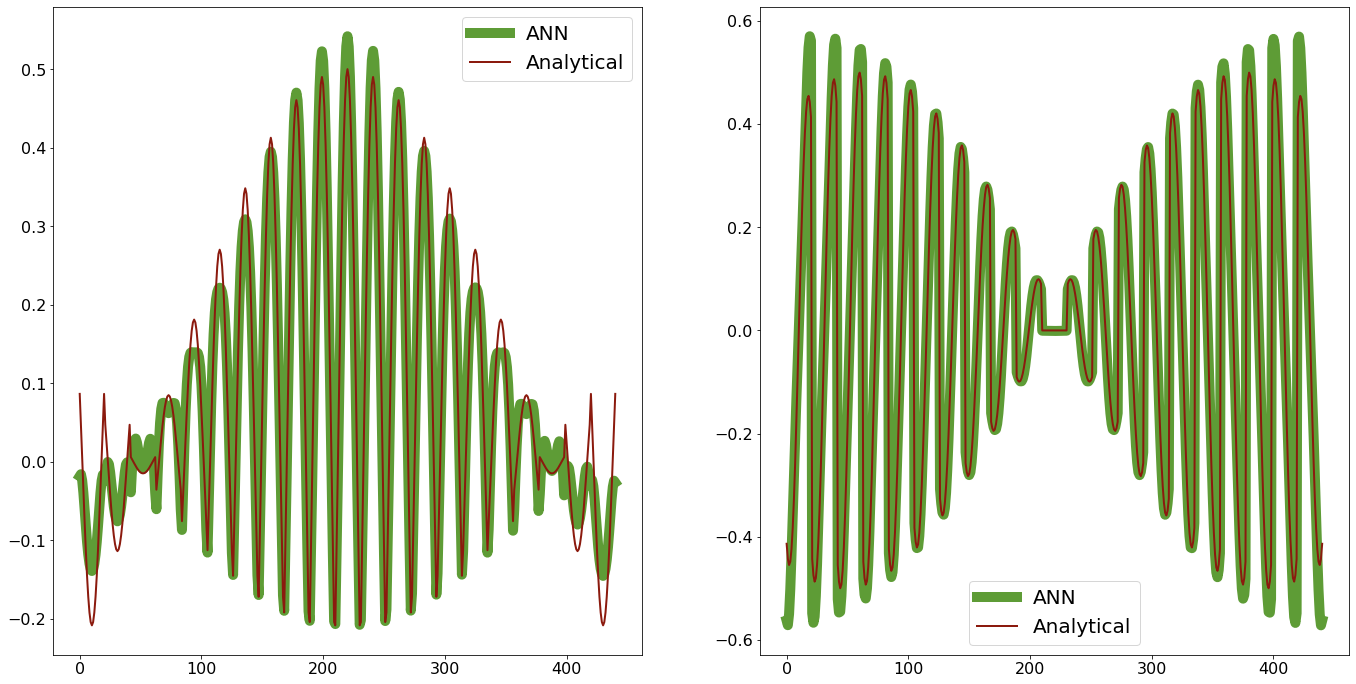

In [18]:
indx = list( range( len(der) ))
plt.figure(1, figsize=(24, 12))
plt.title("$ Derivatives of the ANN")
plt.subplot(1,2,1)
plt.plot(indx, der1, label="ANN", linewidth=10, color=colors["21"])
plt.plot(indx, dzdx_ref_1D, label="Analytical", linewidth=2, color=colors["11"])
plt.legend()

plt.subplot(1,2,2)
plt.plot(indx, der2, label="ANN", linewidth=10, color=colors["21"])
plt.plot(indx, dzdy_ref_1D, label="Analytical", linewidth=2, color=colors["11"])
plt.legend()

And also do the same as the 2D maps
<a name="plot_map-1"></a>

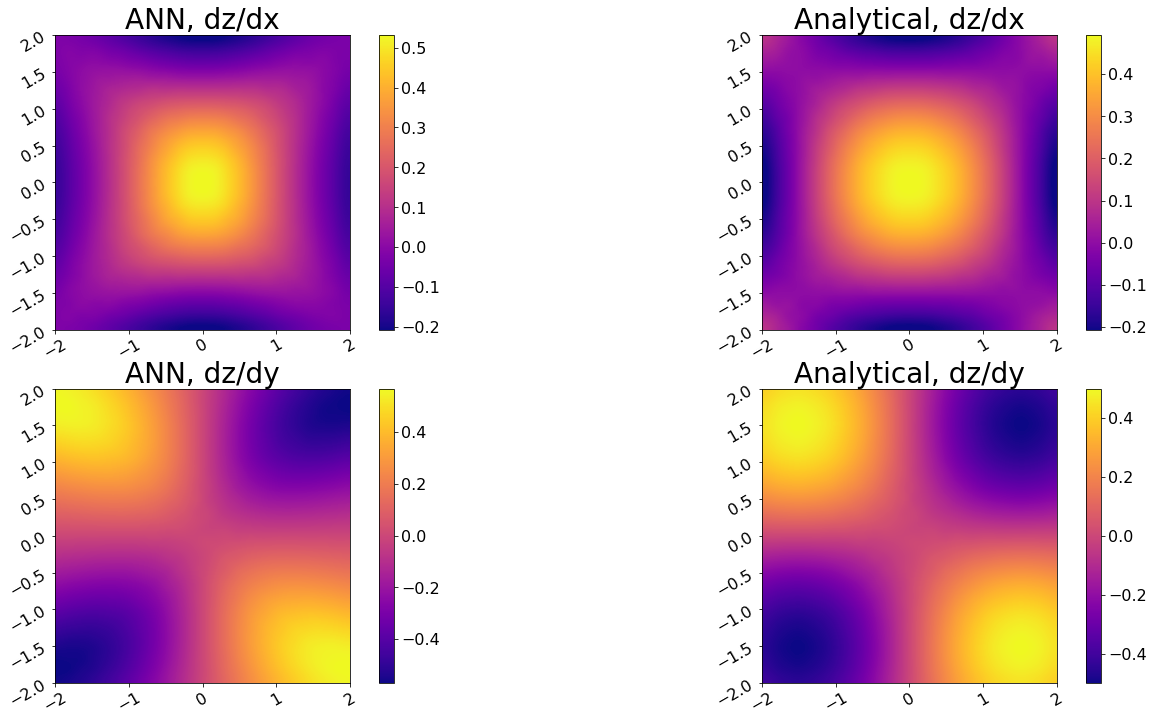

In [19]:
plt.rc('axes', titlesize=28)
plt.figure(1, figsize=(24, 12))

plt.subplot(2,2,1)
plt.title("ANN, dz/dx")
data_visualize.plot_map(plt, x_grid, y_grid, der1.reshape(nx, ny), colormap="plasma", resolution=30j, savefig=0, figure_name="")

plt.subplot(2,2,2)
plt.title("Analytical, dz/dx")
data_visualize.plot_map(plt, x_grid, y_grid, dzdx_ref_1D.reshape(nx, ny), colormap="plasma", resolution=30j, savefig=0, figure_name="")

plt.subplot(2,2,3)
plt.title("ANN, dz/dy")
data_visualize.plot_map(plt, x_grid, y_grid, der2.reshape(nx, ny), colormap="plasma", resolution=30j, savefig=0, figure_name="")

plt.subplot(2,2,4)
plt.title("Analytical, dz/dy")
data_visualize.plot_map(plt, x_grid, y_grid, dzdy_ref_1D.reshape(nx, ny), colormap="plasma", resolution=30j, savefig=0, figure_name="")